In [ ]:
#12/6 @ 10:20 am -- We've incorporated two different regression model approaches for our data set.
#      1) Our first approach involves manually reviewing our independent variables' correlation matrix to identify features with high collinearity;
#      2) Our second approach incorporates preprocesses our data to incorporate a Polynomial Feature set. We then used two Filter Method (Variance Threshold, mutual_info_regression) approaches to reduce our feature sets, then fitting our model to that data set.

# Result: The Mean Squared Error in approach 2 () was about 4 times the size of approach 1, meaning that our approach 2 incorporates more erroneous features than approach 1
# Thoughts: We could look into our feature selection process in approach 2 to indentify potential pitfalls.
# Side Note: We know there is at least one update to apporoach one to lower its MSE (remove Buc-ee's)

In [1]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn import pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn import metrics
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df_election_data = pd.read_csv('election_data.csv')
df_population_data = pd.read_csv('population_data.csv')

In [3]:
df_district_results = df_election_data.iloc[0:-2]
df_district_results.head()

,Race,REP,Total Votes,prop_r_vote
0,TX_01,167734,231969,0.723088
1,TX_02,139012,262924,0.528716
2,TX_03,168775,311070,0.542563
3,TX_04,188003,248373,0.756938
4,TX_05,130404,209147,0.623504


In [4]:
df_population_data.head()

,Unnamed: 0,older_proportion,proportion_white,proportion_male,born_in_TX,mean_income,higher_education,unemployment_rate,bucees
0,District 01 Estimate,0.421819,0.770341,0.488964,0.773983,66809,0.297772,0.060640,0
1,District 02 Estimate,0.352724,0.676836,0.500970,0.651026,108618,0.490439,0.042236,0
2,District 03 Estimate,0.338312,0.685146,0.490954,0.555650,122057,0.612976,0.036385,0
3,District 04 Estimate,0.426503,0.812625,0.491080,0.725613,74581,0.315266,0.049219,0
4,District 05 Estimate,0.373478,0.773341,0.502425,0.769360,69802,0.265619,0.047108,1


In [5]:
df_population_data["prop_r_vote"] = df_district_results['prop_r_vote']

In [6]:
full_data = df_population_data
full_data.set_index("Unnamed: 0", inplace=True)
full_data.head()

,older_proportion,proportion_white,proportion_male,born_in_TX,mean_income,higher_education,unemployment_rate,bucees,prop_r_vote
Unnamed: 0,,,,,,,,,
District 01 Estimate,0.421819,0.770341,0.488964,0.773983,66809,0.297772,0.060640,0,0.723088
District 02 Estimate,0.352724,0.676836,0.500970,0.651026,108618,0.490439,0.042236,0,0.528716
District 03 Estimate,0.338312,0.685146,0.490954,0.555650,122057,0.612976,0.036385,0,0.542563
District 04 Estimate,0.426503,0.812625,0.491080,0.725613,74581,0.315266,0.049219,0,0.756938
District 05 Estimate,0.373478,0.773341,0.502425,0.769360,69802,0.265619,0.047108,1,0.623504


In [7]:
# df_population_data.to_csv('/Users/jim_jack/Documents/mod_2_project/mod_2_project_ds102218/full_data.csv')

In [8]:
#Initial Model
outcome = 'prop_r_vote'
predictors = full_data.drop([outcome,"mean_income","higher_education"], axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
formula

'prop_r_vote~older_proportion+proportion_white+proportion_male+born_in_TX+unemployment_rate+bucees'

In [9]:
#Initial Model Outcome; Note white/non-white and unemployment rate don't seem to be not well correlated; will remove
model = ols(formula= formula, data=full_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            prop_r_vote   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     18.54
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           9.89e-09
Time:                        10:12:08   Log-Likelihood:                 30.319
No. Observations:                  36   AIC:                            -46.64
Df Residuals:                      29   BIC:                            -35.55
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -6.8105      1.462     -4.658      0.000      -9.801      -3.820
older_proportion      4.1519      0.644      6.448      0.000       2.835       5.469
proportion_white      0.0565      0.218      0.259      0.798      -0.390       0.503
proportion_male      13.1086      2.967      4.418      0.000       7.040      19.177
born_in_TX           -0.8282      0.369     -2.243      0.033      -1.583      -0.073
unemployment_rate    -2.4426      2.860     -0.854      0.400      -8.291       3.406
bucees                0.0215      0.047      0.458      0.650      -0.074       0.117
==============================================================================
Omnibus:                        1.127   Durbin-Watson:                   2.374
Prob(Omnibus):                  0.569   Jarque-Bera (JB):                1.017
Skew:                          -0.219   Prob(JB):                        0.601
Kurtosis:                       2.302   Cond. No.                         280.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
full_data.born_in_TX

Unnamed: 0
District 01 Estimate    0.773983
District 02 Estimate    0.651026
District 03 Estimate    0.555650
District 04 Estimate    0.725613
District 05 Estimate    0.769360
District 06 Estimate    0.701493
District 07 Estimate    0.662300
District 08 Estimate    0.686633
District 09 Estimate    0.769971
District 10 Estimate    0.697591
District 11 Estimate    0.789328
District 12 Estimate    0.685364
District 13 Estimate    0.744432
District 14 Estimate    0.743897
District 15 Estimate    0.852012
District 16 Estimate    0.785423
District 17 Estimate    0.768396
District 18 Estimate    0.794404
District 19 Estimate    0.795769
District 20 Estimate    0.797475
District 21 Estimate    0.666184
District 22 Estimate    0.690154
District 23 Estimate    0.804793
District 24 Estimate    0.612791
District 25 Estimate    0.623470
District 26 Estimate    0.577323
District 27 Estimate    0.830769
District 28 Estimate    0.841652
District 29 Estimate    0.881093
District 30 Estimate    0.783724

In [11]:
#Second Model
outcome_2 = 'prop_r_vote'
predictors_2 = full_data.drop([outcome_2,"mean_income","higher_education","unemployment_rate",'proportion_white'], axis=1)
pred_sum_2 = "+".join(predictors_2.columns)
formula_2 = outcome_2 + "~" + pred_sum_2
formula_2

'prop_r_vote~older_proportion+proportion_male+born_in_TX+bucees'

In [12]:
#Second Model Outcome; p-values are all significant; R**2 increased by .009
model_2 = ols(formula= formula_2, data=full_data).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            prop_r_vote   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     28.48
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           5.48e-10
Time:                        10:12:08   Log-Likelihood:                 29.711
No. Observations:                  36   AIC:                            -49.42
Df Residuals:                      31   BIC:                            -41.50
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -7.2504      1.338     -5.419      0.000      -9.979      -4.522
older_proportion     4.4164      0.525      8.409      0.000       3.345       5.488
proportion_male     13.9595      2.723      5.127      0.000       8.406      19.513
born_in_TX          -1.0431      0.237     -4.409      0.000      -1.526      -0.561
bucees               0.0111      0.045      0.248      0.806      -0.080       0.102
==============================================================================
Omnibus:                        0.832   Durbin-Watson:                   2.446
Prob(Omnibus):                  0.660   Jarque-Bera (JB):                0.771
Skew:                          -0.044   Prob(JB):                        0.680
Kurtosis:                       2.289   Cond. No.                         225.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:

X_train, X_test, y_train, y_test = train_test_split(predictors_2, full_data.prop_r_vote, test_size = 0.2)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [40]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [41]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 0.011790139239368136
Test Mean Squarred Error: 0.01327942585710904


In [42]:
#sklearn method; Second model results
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.011790139239368136
Test Mean Squarred Error: 0.01327942585710904


In [ ]:
# both the numpy and sklearn apporaches come to the same train and test MSE

In [13]:
#Begin Train, test, split montage with additional features
features_draft = full_data.iloc[:,:-1]
features = features_draft.drop('mean_income',axis=1)
target = full_data.prop_r_vote


# y = full_data[["prop_r_vote"]]
# X = full_data.drop(["prop_r_vote"], axis=1)

In [14]:
X_train_features, X_test_features, y_train_features, y_test_features = train_test_split(features, target, test_size = 0.2)

In [15]:
scaler = preprocessing.StandardScaler()

In [16]:
scaler.fit(features.iloc[:,:-1])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
#example functions to scale the training data
# scaler.fit(X_train.iloc[:,:-1])
# features_scaled_train = pd.DataFrame(scaler.transform(X_train.iloc[:,:-1]), columns=X_train.columns[:-1], index=X_train.index)

# features_scaled_train['bucess']= X_train.female

# features_scaled_train.head()

In [18]:
#example intermediate step to show unscaled test data
# X_test.head()

In [19]:
#example functions to scale the test data
# features_scaled_test = pd.DataFrame(scaler.transform(X_test.iloc[:,:-1]), columns=X_test.columns[:-1], index=X_test.index)

# features_scaled_test['bucees']= X_test.female

# features_scaled_test.head()

In [20]:
poly = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
features_plus_train = pd.DataFrame(poly.fit_transform(X_train_features), columns=poly.get_feature_names(X_train_features.columns))
features_plus_train.head()

,older_proportion,proportion_white,proportion_male,born_in_TX,higher_education,unemployment_rate,bucees,older_proportion^2,older_proportion proportion_white,older_proportion proportion_male,...,born_in_TX^2,born_in_TX higher_education,born_in_TX unemployment_rate,born_in_TX bucees,higher_education^2,higher_education unemployment_rate,higher_education bucees,unemployment_rate^2,unemployment_rate bucees,bucees^2
0,0.397898,0.855105,0.491565,0.666184,0.533026,0.034397,0.0,0.158323,0.340244,0.195593,...,0.443801,0.355093,0.022915,0.000000,0.284117,0.018335,0.000000,0.001183,0.000000,0.0
1,0.333735,0.748680,0.493566,0.575662,0.455091,0.044893,1.0,0.111379,0.249861,0.164720,...,0.331386,0.261978,0.025843,0.575662,0.207108,0.020431,0.455091,0.002015,0.044893,1.0
2,0.412033,0.858957,0.493136,0.830769,0.281769,0.052219,1.0,0.169771,0.353918,0.203188,...,0.690176,0.234085,0.043382,0.830769,0.079394,0.014714,0.281769,0.002727,0.052219,1.0
3,0.356327,0.834719,0.507412,0.795769,0.293218,0.049204,0.0,0.126969,0.297433,0.180805,...,0.633248,0.233333,0.039155,0.000000,0.085977,0.014427,0.000000,0.002421,0.000000,0.0
4,0.341774,0.612455,0.493294,0.690154,0.561171,0.057529,1.0,0.116810,0.209321,0.168595,...,0.476312,0.387294,0.039704,0.690154,0.314913,0.032284,0.561171,0.003310,0.057529,1.0


In [21]:
features_plus_test = pd.DataFrame(poly.fit_transform(X_test_features), columns=poly.get_feature_names(X_test_features.columns))
features_plus_test.head()

,older_proportion,proportion_white,proportion_male,born_in_TX,higher_education,unemployment_rate,bucees,older_proportion^2,older_proportion proportion_white,older_proportion proportion_male,...,born_in_TX^2,born_in_TX higher_education,born_in_TX unemployment_rate,born_in_TX bucees,higher_education^2,higher_education unemployment_rate,higher_education bucees,unemployment_rate^2,unemployment_rate bucees,bucees^2
0,0.324985,0.639870,0.493431,0.612791,0.524392,0.038372,0.0,0.105615,0.207948,0.160358,...,0.375513,0.321343,0.023514,0.000000,0.274987,0.020122,0.000000,0.001472,0.000000,0.0
1,0.296198,0.693808,0.504759,0.779531,0.299215,0.051702,1.0,0.087734,0.205505,0.149509,...,0.607668,0.233247,0.040303,0.779531,0.089530,0.015470,0.299215,0.002673,0.051702,1.0
2,0.338014,0.752277,0.496324,0.768396,0.384890,0.045468,0.0,0.114253,0.254280,0.167764,...,0.590432,0.295748,0.034937,0.000000,0.148140,0.017500,0.000000,0.002067,0.000000,0.0
3,0.351962,0.650283,0.487003,0.701493,0.377411,0.038909,0.0,0.123878,0.228875,0.171407,...,0.492093,0.264751,0.027294,0.000000,0.142439,0.014685,0.000000,0.001514,0.000000,0.0
4,0.358272,0.917820,0.498507,0.883663,0.227755,0.058353,0.0,0.128359,0.328829,0.178601,...,0.780860,0.201258,0.051564,0.000000,0.051872,0.013290,0.000000,0.003405,0.000000,0.0


In [22]:
#Begin variance threshold feature analysis; feature test type = Filter Method
#there are additional options within VT that will show how and which columns were dropped
def variance_threshold_selector(data, threshold=0.01):
    #changed variance to .25
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [23]:
features_selected_train = variance_threshold_selector(features_plus_train)

In [24]:
features_selected_train.head()

,proportion_white,higher_education,bucees,older_proportion bucees,proportion_white^2,proportion_white born_in_TX,proportion_white bucees,proportion_male bucees,born_in_TX^2,born_in_TX bucees,higher_education bucees,bucees^2
0,0.855105,0.533026,0.0,0.000000,0.731204,0.569657,0.000000,0.000000,0.443801,0.000000,0.000000,0.0
1,0.748680,0.455091,1.0,0.333735,0.560521,0.430986,0.748680,0.493566,0.331386,0.575662,0.455091,1.0
2,0.858957,0.281769,1.0,0.412033,0.737807,0.713594,0.858957,0.493136,0.690176,0.830769,0.281769,1.0
3,0.834719,0.293218,0.0,0.000000,0.696755,0.664243,0.000000,0.000000,0.633248,0.000000,0.000000,0.0
4,0.612455,0.561171,1.0,0.341774,0.375101,0.422688,0.612455,0.493294,0.476312,0.690154,0.561171,1.0


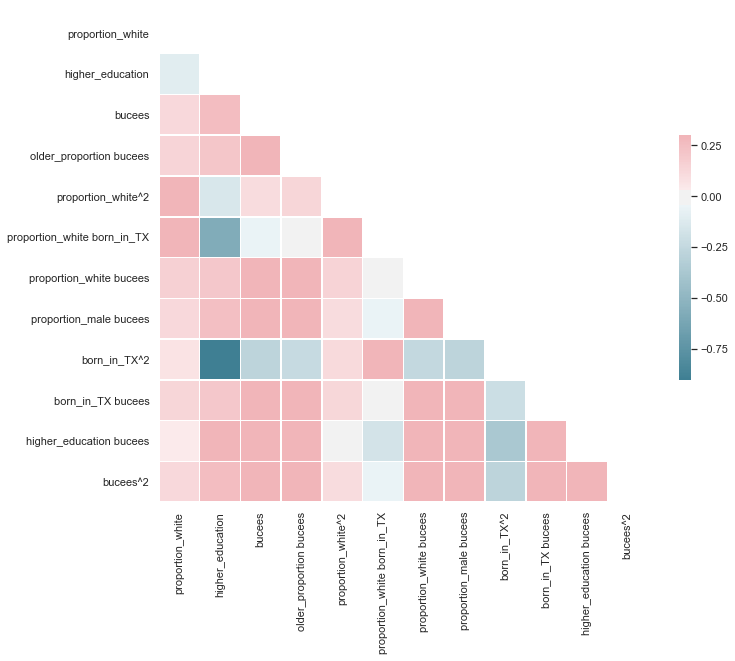

In [25]:
#review correlations to see if any are closely correlated; 


sns.set(style="white")


# Compute the correlation matrix
corr = features_selected_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [26]:
# Create correlation matrix
corr_matrix = features_selected_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95; if greater that .95 drop them
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [27]:
upper

,proportion_white,higher_education,bucees,older_proportion bucees,proportion_white^2,proportion_white born_in_TX,proportion_white bucees,proportion_male bucees,born_in_TX^2,born_in_TX bucees,higher_education bucees,bucees^2
proportion_white,NaN,0.104782,0.121966,0.143074,0.994520,0.829810,0.159497,0.123272,0.070482,0.138524,0.040145,0.121966
higher_education,NaN,NaN,0.253686,0.212483,0.148026,0.571187,0.209426,0.252038,0.902496,0.204827,0.368899,0.253686
bucees,NaN,NaN,NaN,0.995091,0.107018,0.055124,0.992894,0.999929,0.275870,0.989662,0.957139,1.000000
older_proportion bucees,NaN,NaN,NaN,NaN,0.131691,0.012299,0.996025,0.995356,0.230815,0.997826,0.925856,0.995091
proportion_white^2,NaN,NaN,NaN,NaN,NaN,0.847775,0.148899,0.108471,0.112935,0.127577,0.015730,0.107018
proportion_white born_in_TX,NaN,NaN,NaN,NaN,NaN,NaN,0.013035,0.053852,0.612220,0.000484,0.171994,0.055124
proportion_white bucees,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.993309,0.250354,0.989202,0.922091,0.992894
proportion_male bucees,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.275391,0.989789,0.955986,0.999929
born_in_TX^2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204751,0.368444,0.275870
born_in_TX bucees,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.916483,0.989662


In [28]:
#columns that will be dropped because they have more than .95 correlation
to_drop

['older_proportion bucees',
 'proportion_white^2',
 'proportion_white bucees',
 'proportion_male bucees',
 'born_in_TX bucees',
 'higher_education bucees',
 'bucees^2']

In [29]:
features_selected_train.drop(columns=to_drop, inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [30]:
#Begin mutual info regression looks at data and strips out only be the most useful features (not sure how) 
def information_selector(X, y, scoring, k=5):
    selector = SelectKBest(score_func=scoring, k=k)
    selector.fit(X, y)
    return X[X.columns[selector.get_support(indices=True)]]

In [31]:
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(features_selected_train, y_train_features)

In [32]:
features_selected_train[features_selected_train.columns[fit.get_support(indices=True)]].head()

,proportion_white,higher_education,bucees,proportion_white born_in_TX,born_in_TX^2
0,0.855105,0.533026,0.0,0.569657,0.443801
1,0.748680,0.455091,1.0,0.430986,0.331386
2,0.858957,0.281769,1.0,0.713594,0.690176
3,0.834719,0.293218,0.0,0.664243,0.633248
4,0.612455,0.561171,1.0,0.422688,0.476312


In [33]:
features_selected_train = information_selector(features_selected_train, y_train_features, mutual_info_regression, k='all')

In [34]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(features_selected_train, y_train_features)

In [35]:
features_selected_test = features_plus_test[features_selected_train.columns]
y_pred_features = lm.predict(features_selected_test)

print(metrics.mean_absolute_error(y_test_features, y_pred_features))
print(metrics.mean_squared_error(y_test_features, y_pred_features))
print(np.sqrt(metrics.mean_squared_error(y_test_features, y_pred_features)))

0.14924503683157062
0.04331920297256145
0.20813265715058138


In [ ]:
#think about feature selection methods